In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import math

In [7]:
import thinfilm as tf
import thinfilm2 as tf2
import tmm

In [18]:
def plot(theta, x):
    plt.plot(theta, x[:,0], 'r-', theta, x[:,1], 'r--')
    plt.plot(theta, x[:,2], 'b-', theta, x[:,3], 'b--')
    plt.legend(['reflectanceP', 'reflectanceS', 'transmittanceP', 'transmittanceS'])

def foo(Module, nin, nex, layers):
    theta = np.linspace(0, 0.5 * np.pi, 200)
    x = np.zeros((len(theta), 4))

    for i, th in enumerate(theta):
        x[i] = Module.compute(np.cos(th), nin, nex, layers)

    plot(theta, x)
    
def foo_tmm(nin, nex, layers):
    d_list = [tmm.inf] + [l[1] for l in layers] + [tmm.inf]
    # list of refractive indices
    n_list = [nin] + [l[0] for l in layers] + [nex]

    theta = np.linspace(0, 0.5 * np.pi, 200)

    x = np.zeros((len(theta), 4))

    for i, th in enumerate(theta):
        resP = tmm.coh_tmm('p', n_list, d_list, theta[i], 1)
        resS = tmm.coh_tmm('s', n_list, d_list, theta[i], 1)
        x[i] = [resP['R'], resS['R'], resP['T'], resS['T']]
    
    plot(theta, x)

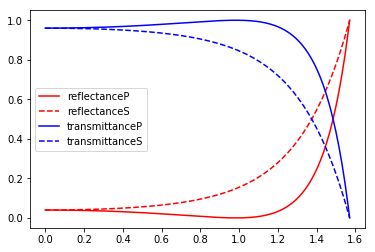

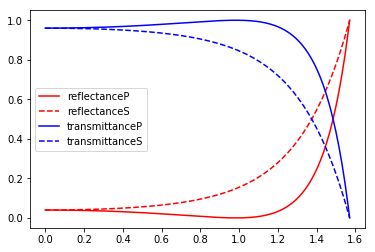

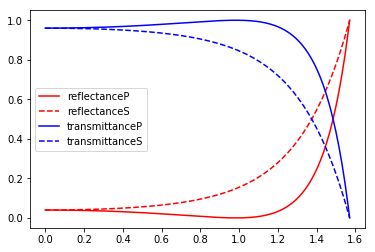

In [19]:
foo(tf, 1.0, 1.5, [])
plt.figure()
foo(tf2, 1.0, 1.5, [])
plt.figure()
foo_tmm(1.0, 1.5, [])

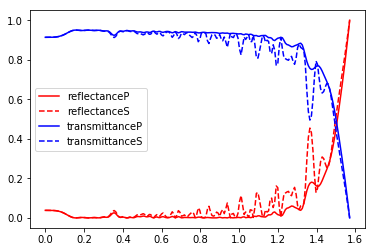

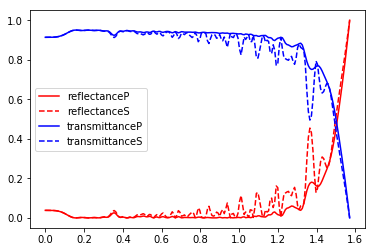

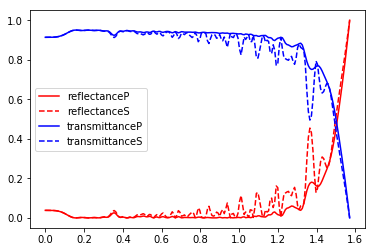

In [20]:
foo(tf, 1.0, 1.5, [[1.1+1e-4j, 10], [1.2+1e-4j, 10], [1.3+1e-4j, 10], [1.4+1e-4j, 10]])
plt.figure()
foo(tf2, 1.0, 1.5, [[1.1+1e-4j, 10], [1.2+1e-4j, 10], [1.3+1e-4j, 10], [1.4+1e-4j, 10]])
plt.figure()
foo_tmm(1.0, 1.5, [[1.1+1e-4j, 10], [1.2+1e-4j, 10], [1.3+1e-4j, 10], [1.4+1e-4j, 10]])

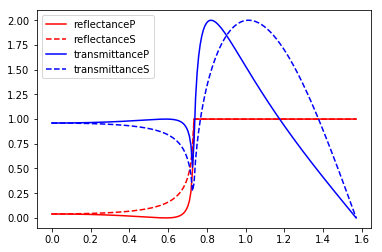

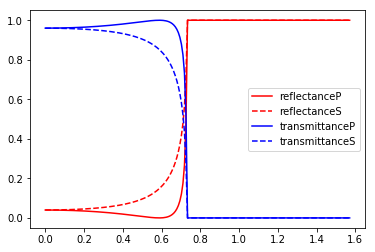

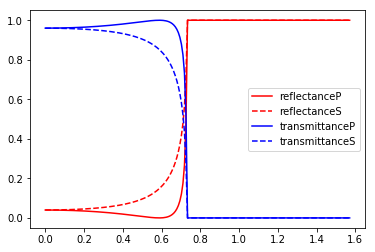

In [21]:
foo(tf, 1.5, 1.0, [])
plt.figure()
foo(tf2, 1.5, 1.0, [])
plt.figure()
foo_tmm(1.5, 1.0, [])

AssertionError: Error in n0 or th0!

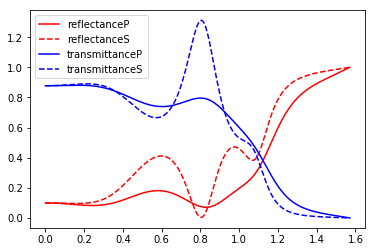

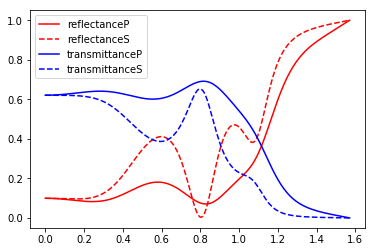

In [46]:
foo(tf,  1.5+0.01j, 1.0+1j, [[2+0.01j, 1], [1.4+0.02j, 0.5]])
plt.figure()
foo(tf2, 1.5+0.01j, 1.0+1j, [[2+0.01j, 1], [1.4+0.02j, 0.5]])
plt.figure()
foo_tmm( 1.5+0.01j, 1.0+1j, [[2+0.01j, 1], [1.4+0.02j, 0.5]])